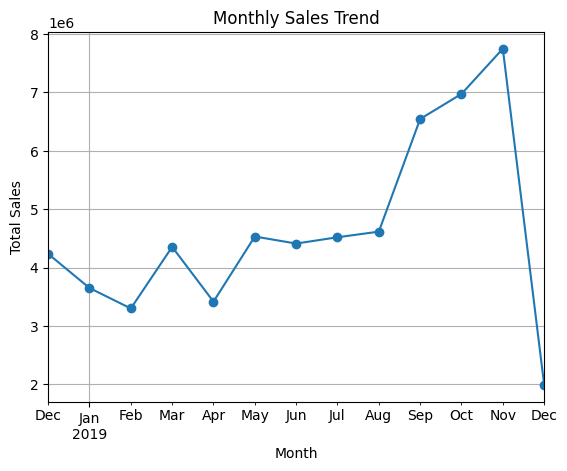

Top 10 Most Frequently Purchased Products:
ProductName
Popcorn Holder                        56450
World War 2 Gliders Asstd Designs     53847
Jumbo Bag Red Retrospot               47363
Assorted Colour Bird Ornament         36445
Pack Of 72 Retrospot Cake Cases       36231
Cream Hanging Heart T-Light Holder    35378
Rabbit Night Light                    30680
Mini Paint Set Vintage                26437
Pack Of 12 London Tissues             25907
Pack Of 60 Pink Paisley Cake Cases    24753
Name: Quantity, dtype: int64

Average number of products per transaction:
229.28124461299777

Top 10 Most Profitable Customers:
CustomerNo
14646.0    2108959.95
18102.0     897137.36
12415.0     895267.24
17450.0     876816.01
14911.0     873037.90
14156.0     683869.28
14298.0     634173.99
13694.0     630949.58
17511.0     627685.41
16684.0     518976.78
Name: Sales, dtype: float64

Strategy Recommendation:

- Focus marketing efforts on the most purchased products to boost volume.
- Create loyalty 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
def load_data():

    file_path = r"C:\Users\topsa\Desktop\PYTHON\excel-automation-report-generator\raw_data\Sales Transaction.csv"
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    return df

df = load_data()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Sales' column (Price x Quantity)
df['Sales'] = df['Price'] * df['Quantity']

# 1. How was the sales trend over the months?
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plotting the sales trend
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# 2. What are the most frequently purchased products?
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

print("Top 10 Most Frequently Purchased Products:")
print(top_products.head(10))

# 3. How many products does the customer purchase in each transaction?
products_per_transaction = df.groupby('TransactionNo')['Quantity'].sum()

print("\nAverage number of products per transaction:")
print(products_per_transaction.mean())

# 4. What are the most profitable segment customers?
# Assume 'CustomerNo' represents a customer.
customer_profit = df.groupby('CustomerNo')['Sales'].sum().sort_values(ascending=False)

print("\nTop 10 Most Profitable Customers:")
print(customer_profit.head(10))

# 5. Based on findings, strategy recommendation
# (You would usually write this as a text based on the results above)
print("\nStrategy Recommendation:")
print("""
- Focus marketing efforts on the most purchased products to boost volume.
- Create loyalty programs for top spending customers.
- Bundle frequently bought products to increase transaction size.
- Monitor slow months and run targeted promotions or discounts during those periods.
""")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# 2. Aggregate metrics
monthly_sales    = df.groupby('Month')['Sales'].sum()
top_products     = df.groupby('ProductName')['Quantity'].sum().nlargest(10)
products_per_txn = df.groupby('TransactionNo')['Quantity'].sum()
customer_profit  = df.groupby('CustomerNo')['Sales'].sum().nlargest(10)

# 3. Generate PDF
with PdfPages('sales_report.pdf') as pdf:
    # ---- Title Page ----
    fig = plt.figure(figsize=(8.5, 11))
    fig.text(0.5, 0.6, "Monthly Sales & Customer Analysis", ha='center', va='center', size=24)
    fig.text(0.5, 0.5, "Generated on: " + pd.Timestamp.now().strftime('%Y-%m-%d'), 
             ha='center', va='center', size=12)
    pdf.savefig(fig)
    plt.close(fig)

    # ---- Monthly Sales Trend ----
    fig, ax = plt.subplots(figsize=(8, 6))
    monthly_sales.index = monthly_sales.index.to_timestamp()  # convert PeriodIndex to Timestamp
    ax.plot(monthly_sales.index, monthly_sales.values, marker='o')
    ax.set_title("Monthly Sales Trend")
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Sales")
    ax.grid(True)
    pdf.savefig(fig)
    plt.close(fig)

    # ---- Top 10 Products by Quantity ----
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(top_products.index[::-1], top_products.values[::-1])
    ax.set_title("Top 10 Most Frequently Purchased Products")
    ax.set_xlabel("Total Quantity Sold")
    # Tidy up margins so labels aren’t cut off
    fig.tight_layout()
    fig.subplots_adjust(left=0.35)
    pdf.savefig(fig)
    plt.close(fig)

    # ---- Products per Transaction Distribution ----
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(products_per_txn, bins=20, edgecolor='black')
    ax.set_title("Distribution of Products per Transaction")
    ax.set_xlabel("Number of Items")
    ax.set_ylabel("Number of Transactions")
    pdf.savefig(fig)
    plt.close(fig)

    import matplotlib.ticker as mtick

    # ---- Top 10 Profitable Customers (formatted) ----
    fig, ax = plt.subplots(figsize=(10, 8))

    # Sort so that the smallest is at the bottom
    profits = customer_profit.sort_values()

    # Draw horizontal bars
    ax.barh(profits.index.astype(str), profits.values)

    # Put the largest at the top
    ax.invert_yaxis()

    # Titles and axis labels
    ax.set_title("Top 10 Most Profitable Customers", fontsize=16, pad=15)
    ax.set_xlabel("Total Sales ($)", fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    # Disable scientific notation and add commas
    ax.ticklabel_format(style='plain', axis='x')
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    # Annotate each bar with its dollar value
    max_val = profits.values.max()
    for i, val in enumerate(profits.values):
        ax.text(
        val + max_val*0.01,  # slight offset to the right
        i, 
        f'${val:,.0f}', 
        va='center', 
        fontsize=12
        )

    # Tidy up margins
    fig.tight_layout()
    fig.subplots_adjust(left=0.3)

    # Save to your PDF
    pdf.savefig(fig)
    plt.close(fig)


    # ---- Narrative / Strategy Page ----
    import textwrap

    strategy_lines = [
    "Strategy Recommendations:",
    "",
    "- Focus marketing and promos on the top-selling products to drive volume.",
    "- Introduce bundle offers of frequently co-purchased items to increase average basket size.",
    "- Launch a VIP loyalty program targeting your highest-spending customers.",
    "- Run targeted sales or discounts during traditionally slow months to smooth out revenue dips."
    ]
    # join into one text block
    strategy_text = "\n".join(strategy_lines)

    fig = plt.figure(figsize=(8.5, 11))
    fig.patch.set_facecolor('white')

    # full-page axes
    ax = fig.add_subplot(111)
    ax.axis('off')

    # draw text in axes coordinates
    ax.text(
    0.1, 0.95,                # x, y in axes coords (0,0 lower left; 1,1 upper right)
    strategy_text,
    va='top',                 # start at the top
    fontsize=12,
    wrap=True
    )

    fig.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)

print("PDF report generated: sales_report.pdf")


IndentationError: expected an indented block after 'for' statement on line 78 (2121694984.py, line 79)